In [1]:
!pip install textblob

In [2]:
!pip3 install --upgrade setuptools

In [3]:
!pip install wordnet

In [4]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)



In [5]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to C:\Users\SHAIKH
[nltk_data]     SOHEL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [6]:
df = pd.read_csv('tweets.zip')
df

,id,hashtag_generation_time,searched_hashtag,tweet_id,tweet_created_at,screen_name,name,user_description,followers_count,tweet,location,iso_language_code,retweet_count,user_created_at,favorite_count,entities,tweet_source,verified
0,7549,2022-08-26 13:56:37.490901+00,CBI Unfold D Truth InSSRCase,1563158353391779844,2022-08-26 13:36:08+00,ATUL7735,ATUL,NaN,301,RT @privin07: @divine__ssr @ATUL7735 Thanks a ...,India,en,4,2011-03-15,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False
1,6327,2022-08-26 13:54:52.480426+00,CBI Unfold D Truth InSSRCase,1563163059002101762,2022-08-26 13:54:50+00,BabyPink1803,Alli,Justice 4 Disha & SSR ~ :): 💛🦋💫 ~Your vibes sp...,1115,RT @keesain99: CBI Unfold D Truth InSSRCase \n...,Australia,en,114,2012-08-21,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False
2,6328,2022-08-26 13:54:52.618819+00,CBI Unfold D Truth InSSRCase,1563163056934334464,2022-08-26 13:54:49+00,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @ChintuJainHS: @SatyaSSRian1 @PMOIndia @DoP...,Canada,en,2,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False
3,6329,2022-08-26 13:54:52.656809+00,CBI Unfold D Truth InSSRCase,1563163055390744576,2022-08-26 13:54:49+00,its_ssrwarrior,S U P R I Y A,A Proud Fan of Sushant Singh Rajput.,2006,RT @sushfanseg: Why Rhea Chakraborty's custodi...,Earth,en,6,2020-10-02,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False
4,6330,2022-08-26 13:54:52.696796+00,CBI Unfold D Truth InSSRCase,1563163052102791168,2022-08-26 13:54:48+00,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @manisha_1604: @SatyaSSRian1 @PMOIndia @DoP...,Canada,en,10,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5227,11554,2022-08-27 09:37:33.966285+00,Perpetrators Free InSSRCase,1563450246876737536,2022-08-27 08:56:01+00,bunty81t,Prashant Kishor,NaN,44,"RT @SauravS91139716: Good Morning Warrior's,\n...",Delhi,en,62,2010-07-22,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter Web App,False
5228,11555,2022-08-27 09:37:33.96842+00,Perpetrators Free InSSRCase,1563450246373380096,2022-08-27 08:56:00+00,privin07,Preeti🇮🇳 (God➡️Karma🤗🔱🤛🙏💞),God is d ultimate power🌺\nShiva+Shakti🔱🙏\nKris...,3781,RT @GauriSh00526155: @privin07 @IAmApa07 @itsS...,National Capital 🇮🇳,en,4,2009-09-21,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False
5229,11556,2022-08-27 09:37:33.970742+00,Perpetrators Free InSSRCase,1563450245652312064,2022-08-27 08:56:00+00,Justice78602373,Justice For SSR,Fan of Sushant❤️\nSSR Alive in our hearts ❤️ f...,3154,RT @Dipshik37409256: According to SSR's family...,NaN,en,14,2020-07-22,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False
5230,11557,2022-08-27 09:37:33.97306+00,Perpetrators Free InSSRCase,1563450243899092993,2022-08-27 08:56:00+00,kundu_ssrian,Koushani Kundu(SSRian),"Proud to be your fan Sushant , proud to be you...",476,RT @rd20082022: Sushant loved life and was pla...,India,en,24,2021-01-07,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5232 entries, 0 to 5231
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       5232 non-null   int64 
 1   hashtag_generation_time  5232 non-null   object
 2   searched_hashtag         5232 non-null   object
 3   tweet_id                 5232 non-null   int64 
 4   tweet_created_at         5232 non-null   object
 5   screen_name              5232 non-null   object
 6   name                     5232 non-null   object
 7   user_description         4274 non-null   object
 8   followers_count          5232 non-null   int64 
 9   tweet                    5232 non-null   object
 10  location                 2587 non-null   object
 11  iso_language_code        5232 non-null   object
 12  retweet_count            5232 non-null   int64 
 13  user_created_at          5232 non-null   object
 14  favorite_count           5232 non-null  

In [8]:
df.isnull().sum()

id                            0
hashtag_generation_time       0
searched_hashtag              0
tweet_id                      0
tweet_created_at              0
screen_name                   0
name                          0
user_description            958
followers_count               0
tweet                         0
location                   2645
iso_language_code             0
retweet_count                 0
user_created_at               0
favorite_count                0
entities                      0
tweet_source                  0
verified                      0
dtype: int64

In [9]:
df['date_hashtag']=pd.to_datetime(df['hashtag_generation_time'])

In [10]:
df['date_tweet']=pd.to_datetime(df['tweet_created_at'])

In [11]:
df.dtypes

id                                       int64
hashtag_generation_time                 object
searched_hashtag                        object
tweet_id                                 int64
tweet_created_at                        object
screen_name                             object
name                                    object
user_description                        object
followers_count                          int64
tweet                                   object
location                                object
iso_language_code                       object
retweet_count                            int64
user_created_at                         object
favorite_count                           int64
entities                                object
tweet_source                            object
verified                                  bool
date_hashtag               datetime64[ns, UTC]
date_tweet                 datetime64[ns, UTC]
dtype: object

In [12]:
df.dropna(inplace=True)
df = df.reset_index()
df = df.drop(['hashtag_generation_time','tweet_created_at'], axis = 1) 
df.shape

(2467, 19)

In [13]:
np.sum(df.isnull().any(axis=1))

0

In [14]:
df.isnull().sum()

index                0
id                   0
searched_hashtag     0
tweet_id             0
screen_name          0
name                 0
user_description     0
followers_count      0
tweet                0
location             0
iso_language_code    0
retweet_count        0
user_created_at      0
favorite_count       0
entities             0
tweet_source         0
verified             0
date_hashtag         0
date_tweet           0
dtype: int64

In [15]:
df.head()

,index,id,searched_hashtag,tweet_id,screen_name,name,user_description,followers_count,tweet,location,iso_language_code,retweet_count,user_created_at,favorite_count,entities,tweet_source,verified,date_hashtag,date_tweet
0,1,6327,CBI Unfold D Truth InSSRCase,1563163059002101762,BabyPink1803,Alli,Justice 4 Disha & SSR ~ :): 💛🦋💫 ~Your vibes sp...,1115,RT @keesain99: CBI Unfold D Truth InSSRCase \n...,Australia,en,114,2012-08-21,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,2022-08-26 13:54:52.480426+00:00,2022-08-26 13:54:50+00:00
1,2,6328,CBI Unfold D Truth InSSRCase,1563163056934334464,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @ChintuJainHS: @SatyaSSRian1 @PMOIndia @DoP...,Canada,en,2,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,2022-08-26 13:54:52.618819+00:00,2022-08-26 13:54:49+00:00
2,3,6329,CBI Unfold D Truth InSSRCase,1563163055390744576,its_ssrwarrior,S U P R I Y A,A Proud Fan of Sushant Singh Rajput.,2006,RT @sushfanseg: Why Rhea Chakraborty's custodi...,Earth,en,6,2020-10-02,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False,2022-08-26 13:54:52.656809+00:00,2022-08-26 13:54:49+00:00
3,4,6330,CBI Unfold D Truth InSSRCase,1563163052102791168,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @manisha_1604: @SatyaSSRian1 @PMOIndia @DoP...,Canada,en,10,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,2022-08-26 13:54:52.696796+00:00,2022-08-26 13:54:48+00:00
4,6,6332,CBI Unfold D Truth InSSRCase,1563163045748101120,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @PurnimaSengup11: @SatyaSSRian1 @PMOIndia @...,Canada,en,3,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,2022-08-26 13:54:52.796806+00:00,2022-08-26 13:54:46+00:00


<AxesSubplot:xlabel='favorite_count', ylabel='count'>

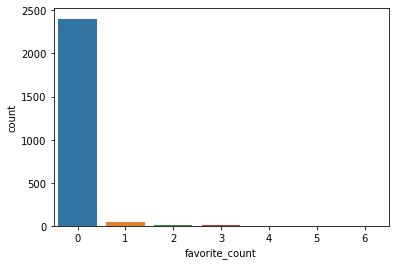

In [16]:
import seaborn as sns
sns.countplot(x = 'favorite_count', data = df)

<AxesSubplot:xlabel='tweet_source', ylabel='count'>

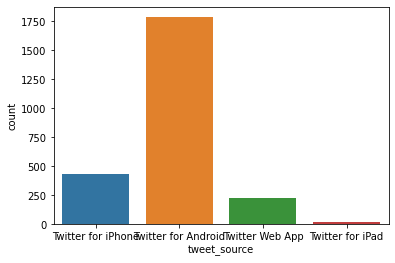

In [17]:
sns.countplot(x = 'tweet_source', data = df)

<AxesSubplot:xlabel='searched_hashtag', ylabel='count'>

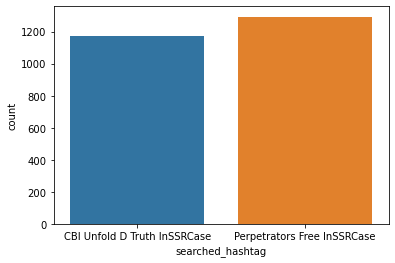

In [18]:
sns.countplot(x = 'searched_hashtag', data = df)

In [19]:
categorical_features = [x for x in df.columns 
                if not (df[x].dtype == np.float64 
                        or df[x].dtype == np.int64)]
print(categorical_features)

['searched_hashtag', 'screen_name', 'name', 'user_description', 'tweet', 'location', 'iso_language_code', 'user_created_at', 'entities', 'tweet_source', 'verified', 'date_hashtag', 'date_tweet']


In [20]:
df["verified"] = df["verified"].astype(int)

In [21]:
df.dtypes

index                              int64
id                                 int64
searched_hashtag                  object
tweet_id                           int64
screen_name                       object
name                              object
user_description                  object
followers_count                    int64
tweet                             object
location                          object
iso_language_code                 object
retweet_count                      int64
user_created_at                   object
favorite_count                     int64
entities                          object
tweet_source                      object
verified                           int32
date_hashtag         datetime64[ns, UTC]
date_tweet           datetime64[ns, UTC]
dtype: object

In [22]:
numerical_features=[x for x in df.columns if df[x].dtype==np.int64 or df[x].dtype==np.float64]
print(numerical_features)

['index', 'id', 'tweet_id', 'followers_count', 'retweet_count', 'favorite_count']


In [23]:
df.columns

Index(['index', 'id', 'searched_hashtag', 'tweet_id', 'screen_name', 'name',
       'user_description', 'followers_count', 'tweet', 'location',
       'iso_language_code', 'retweet_count', 'user_created_at',
       'favorite_count', 'entities', 'tweet_source', 'verified',
       'date_hashtag', 'date_tweet'],
      dtype='object')

In [24]:
df['searched_hashtag'].unique()

array(['CBI Unfold D Truth InSSRCase', 'Perpetrators Free InSSRCase'],
      dtype=object)

In [25]:
df['tweet_source'].unique()

array(['Twitter for iPhone', 'Twitter for Android', 'Twitter Web App',
       'Twitter for iPad'], dtype=object)

In [26]:
df['tweet_id'].unique()

array([1563163059002101762, 1563163056934334464, 1563163055390744576, ...,
       1563450249079037952, 1563450246373380096, 1563450243899092993],
      dtype=int64)

In [27]:
df['iso_language_code'].unique()

array(['en'], dtype=object)

In [28]:
df['favorite_count'].unique()

array([0, 6, 1, 2, 3, 4, 5], dtype=int64)

In [29]:
df['tweet_source'].unique()

array(['Twitter for iPhone', 'Twitter for Android', 'Twitter Web App',
       'Twitter for iPad'], dtype=object)

In [30]:
df['verified'].unique()

array([0])

In [31]:
df['date_hashtag'].unique()

<DatetimeArray>
['2022-08-26 13:54:52.480426+00:00', '2022-08-26 13:54:52.618819+00:00',
 '2022-08-26 13:54:52.656809+00:00', '2022-08-26 13:54:52.696796+00:00',
 '2022-08-26 13:54:52.796806+00:00', '2022-08-26 13:54:52.837799+00:00',
 '2022-08-26 13:54:52.881808+00:00', '2022-08-26 13:54:52.923808+00:00',
 '2022-08-26 13:54:52.969811+00:00', '2022-08-26 13:54:53.052817+00:00',
 ...
 '2022-08-27 09:37:33.122946+00:00', '2022-08-27 09:37:33.124957+00:00',
 '2022-08-27 09:37:33.943558+00:00', '2022-08-27 09:37:33.953027+00:00',
 '2022-08-27 09:37:33.955089+00:00', '2022-08-27 09:37:33.957405+00:00',
 '2022-08-27 09:37:33.959633+00:00', '2022-08-27 09:37:33.961800+00:00',
 '2022-08-27 09:37:33.968420+00:00', '2022-08-27 09:37:33.973060+00:00']
Length: 2467, dtype: datetime64[ns, UTC]

In [32]:
df.duplicated().sum() 

0

In [33]:
df['date_tweet'].unique()

<DatetimeArray>
['2022-08-26 13:54:50+00:00', '2022-08-26 13:54:49+00:00',
 '2022-08-26 13:54:48+00:00', '2022-08-26 13:54:46+00:00',
 '2022-08-26 13:54:45+00:00', '2022-08-26 13:54:42+00:00',
 '2022-08-26 13:54:40+00:00', '2022-08-26 13:54:37+00:00',
 '2022-08-26 13:54:35+00:00', '2022-08-26 13:54:34+00:00',
 ...
 '2022-08-27 08:56:12+00:00', '2022-08-27 08:56:10+00:00',
 '2022-08-27 08:56:08+00:00', '2022-08-27 08:56:06+00:00',
 '2022-08-27 08:56:05+00:00', '2022-08-27 08:56:04+00:00',
 '2022-08-27 08:56:03+00:00', '2022-08-27 08:56:02+00:00',
 '2022-08-27 08:56:01+00:00', '2022-08-27 08:56:00+00:00']
Length: 1913, dtype: datetime64[ns, UTC]

In [34]:
df.head()

,index,id,searched_hashtag,tweet_id,screen_name,name,user_description,followers_count,tweet,location,iso_language_code,retweet_count,user_created_at,favorite_count,entities,tweet_source,verified,date_hashtag,date_tweet
0,1,6327,CBI Unfold D Truth InSSRCase,1563163059002101762,BabyPink1803,Alli,Justice 4 Disha & SSR ~ :): 💛🦋💫 ~Your vibes sp...,1115,RT @keesain99: CBI Unfold D Truth InSSRCase \n...,Australia,en,114,2012-08-21,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,0,2022-08-26 13:54:52.480426+00:00,2022-08-26 13:54:50+00:00
1,2,6328,CBI Unfold D Truth InSSRCase,1563163056934334464,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @ChintuJainHS: @SatyaSSRian1 @PMOIndia @DoP...,Canada,en,2,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,0,2022-08-26 13:54:52.618819+00:00,2022-08-26 13:54:49+00:00
2,3,6329,CBI Unfold D Truth InSSRCase,1563163055390744576,its_ssrwarrior,S U P R I Y A,A Proud Fan of Sushant Singh Rajput.,2006,RT @sushfanseg: Why Rhea Chakraborty's custodi...,Earth,en,6,2020-10-02,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,0,2022-08-26 13:54:52.656809+00:00,2022-08-26 13:54:49+00:00
3,4,6330,CBI Unfold D Truth InSSRCase,1563163052102791168,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @manisha_1604: @SatyaSSRian1 @PMOIndia @DoP...,Canada,en,10,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,0,2022-08-26 13:54:52.696796+00:00,2022-08-26 13:54:48+00:00
4,6,6332,CBI Unfold D Truth InSSRCase,1563163045748101120,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @PurnimaSengup11: @SatyaSSRian1 @PMOIndia @...,Canada,en,3,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,0,2022-08-26 13:54:52.796806+00:00,2022-08-26 13:54:46+00:00


In [35]:
df.columns

Index(['index', 'id', 'searched_hashtag', 'tweet_id', 'screen_name', 'name',
       'user_description', 'followers_count', 'tweet', 'location',
       'iso_language_code', 'retweet_count', 'user_created_at',
       'favorite_count', 'entities', 'tweet_source', 'verified',
       'date_hashtag', 'date_tweet'],
      dtype='object')

In [36]:
df['iso_language_code'].unique()

array(['en'], dtype=object)

In [37]:
df['searched_hashtag'].replace(['CBI Unfold D Truth InSSRCase','Perpetrators Free InSSRCase'],['CBI Unfold D Truth','Perpetrators Free'],inplace=True)
df['tweet_source'].replace(['Twitter for iPhone', 'Twitter for Android', 'Twitter Web App','Twitter for iPad'],['iPhone','Android','Web App','iPad'],inplace=True)
df['iso_language_code'].replace(['en'],['English'],inplace=True)
df.head()

,index,id,searched_hashtag,tweet_id,screen_name,name,user_description,followers_count,tweet,location,iso_language_code,retweet_count,user_created_at,favorite_count,entities,tweet_source,verified,date_hashtag,date_tweet
0,1,6327,CBI Unfold D Truth,1563163059002101762,BabyPink1803,Alli,Justice 4 Disha & SSR ~ :): 💛🦋💫 ~Your vibes sp...,1115,RT @keesain99: CBI Unfold D Truth InSSRCase \n...,Australia,English,114,2012-08-21,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",iPhone,0,2022-08-26 13:54:52.480426+00:00,2022-08-26 13:54:50+00:00
1,2,6328,CBI Unfold D Truth,1563163056934334464,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @ChintuJainHS: @SatyaSSRian1 @PMOIndia @DoP...,Canada,English,2,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",iPhone,0,2022-08-26 13:54:52.618819+00:00,2022-08-26 13:54:49+00:00
2,3,6329,CBI Unfold D Truth,1563163055390744576,its_ssrwarrior,S U P R I Y A,A Proud Fan of Sushant Singh Rajput.,2006,RT @sushfanseg: Why Rhea Chakraborty's custodi...,Earth,English,6,2020-10-02,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Android,0,2022-08-26 13:54:52.656809+00:00,2022-08-26 13:54:49+00:00
3,4,6330,CBI Unfold D Truth,1563163052102791168,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @manisha_1604: @SatyaSSRian1 @PMOIndia @DoP...,Canada,English,10,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",iPhone,0,2022-08-26 13:54:52.696796+00:00,2022-08-26 13:54:48+00:00
4,6,6332,CBI Unfold D Truth,1563163045748101120,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @PurnimaSengup11: @SatyaSSRian1 @PMOIndia @...,Canada,English,3,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",iPhone,0,2022-08-26 13:54:52.796806+00:00,2022-08-26 13:54:46+00:00


In [38]:
df = df[['screen_name','name', 'user_description', 'tweet','entities','searched_hashtag','tweet_id','retweet_count','followers_count','location','user_created_at','favorite_count','tweet_source','verified','date_hashtag','date_tweet']]
df.columns = ['Screen_name', 'Name','User_description','Tweet','Entities','Searched_hashtag','label','Retweet_count','Followers_count','Location','User_created_at','Favorite_count','tweet_source','verified','date_hashtag','date_tweet']

In [39]:
df.describe()

,label,Retweet_count,Followers_count,Favorite_count,verified
count,2.467000e+03,2467.000000,2467.000000,2467.000000,2467.0
mean,1.563313e+18,43.910012,1639.437779,0.047021,0.0
std,1.483751e+14,63.113770,1301.285789,0.353723,0.0
min,1.563151e+18,0.000000,8.000000,0.000000,0.0
25%,1.563158e+18,10.000000,476.000000,0.000000,0.0
50%,1.563451e+18,27.000000,1453.000000,0.000000,0.0
75%,1.563454e+18,58.000000,2116.000000,0.000000,0.0
max,1.563460e+18,779.000000,6251.000000,6.000000,0.0


In [40]:
print("""Step A : Converting html entities i.e. (&lt; &gt; &amp;)
( "&lt;" is converted to “<” and "&amp;" is converted to “&”)""")

Step A : Converting html entities i.e. (&lt; &gt; &amp;)
( "&lt;" is converted to “<” and "&amp;" is converted to “&”)


In [41]:
# Importing HTMLParser
from html.parser import HTMLParser
html_parser = HTMLParser()

In [42]:
# Created a new columns i.e. clean_tweet contains the same tweets but cleaned version
#df['entitle_tweet'] = df['Entities'].apply(lambda x: html_parser.unescape(x))
#df.head(10)

In [43]:
#Step B : Removing "@user" from all the tweets
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [44]:
# remove twitter handles (@user)
df['Tweet'] = np.vectorize(remove_pattern)(df['Tweet'], "@[\w]*")
df['Name'] = np.vectorize(remove_pattern)(df['Name'], "@[\w]*")
df['User_description'] = np.vectorize(remove_pattern)(df['User_description'], "@[\w]*")
df['User_description'] = np.vectorize(remove_pattern)(df['User_description'], "@[\w]*")
df['Screen_name'] = np.vectorize(remove_pattern)(df['Screen_name'], "@[\w]*")
df.head(10)

,Screen_name,Name,User_description,Tweet,Entities,Searched_hashtag,label,Retweet_count,Followers_count,Location,User_created_at,Favorite_count,tweet_source,verified,date_hashtag,date_tweet
0,BabyPink1803,Alli,Justice 4 Disha & SSR ~ :): 💛🦋💫 ~Your vibes sp...,RT : CBI Unfold D Truth InSSRCase \n\nTruth an...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163059002101762,114,1115,Australia,2012-08-21,0,iPhone,0,2022-08-26 13:54:52.480426+00:00,2022-08-26 13:54:50+00:00
1,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,RT : CBI Unfold D Truth InSSRCase🔥,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163056934334464,2,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.618819+00:00,2022-08-26 13:54:49+00:00
2,its_ssrwarrior,S U P R I Y A,A Proud Fan of Sushant Singh Rajput.,RT : Why Rhea Chakraborty's custodial interrog...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163055390744576,6,2006,Earth,2020-10-02,0,Android,0,2022-08-26 13:54:52.656809+00:00,2022-08-26 13:54:49+00:00
3,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,RT : CBI Unfold D Truth InSSRCase🔥🔥,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163052102791168,10,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.696796+00:00,2022-08-26 13:54:48+00:00
4,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,RT : CBI Unfold D Truth InSSRCase🔥,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163045748101120,3,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.796806+00:00,2022-08-26 13:54:46+00:00
5,BabyPink1803,Alli,Justice 4 Disha & SSR ~ :): 💛🦋💫 ~Your vibes sp...,RT : Sushant family and fans are waiting for a...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163044925956097,38,1115,Australia,2012-08-21,0,iPhone,0,2022-08-26 13:54:52.837799+00:00,2022-08-26 13:54:46+00:00
6,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,RT : CBI Unfold D Truth InSSRCase ✊🔥,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163040044154882,7,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.881808+00:00,2022-08-26 13:54:45+00:00
7,Amrita1224,Amrita Singh Rajput,#Bihari hun aur #Rajput bhi. Kaho ?,RT : Many a doctrine is like a window pane. We...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163039318233092,37,528,"Bengaluru, India",2016-01-06,0,iPhone,0,2022-08-26 13:54:52.923808+00:00,2022-08-26 13:54:45+00:00
8,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,RT : Read full name of Cooper hospital : \n\nH...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163027209584643,37,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.969811+00:00,2022-08-26 13:54:42+00:00
9,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,RT : Dr. Kesari Chavda &amp; Mahesh Bhatt are ...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163020716830725,39,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:53.052817+00:00,2022-08-26 13:54:40+00:00


In [45]:
df['Tweet'] = df['Tweet'].apply(lambda x: x.lower())
df['Screen_name'] = df['Screen_name'].apply(lambda x: x.lower())
df['User_description'] = df['User_description'].apply(lambda x: x.lower())
df['Entities'] = df['Entities'].apply(lambda x: x.lower())
df['Name'] = df['Name'].apply(lambda x: x.lower())
df.head(10)

,Screen_name,Name,User_description,Tweet,Entities,Searched_hashtag,label,Retweet_count,Followers_count,Location,User_created_at,Favorite_count,tweet_source,verified,date_hashtag,date_tweet
0,babypink1803,alli,justice 4 disha & ssr ~ :): 💛🦋💫 ~your vibes sp...,rt : cbi unfold d truth inssrcase \n\ntruth an...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163059002101762,114,1115,Australia,2012-08-21,0,iPhone,0,2022-08-26 13:54:52.480426+00:00,2022-08-26 13:54:50+00:00
1,tanutoor85,🍁𝓚𝓞𝓚𝓞(tanutoor)🍁,anshu ♥️|2.0 ♥️|anaya ♥️|aansh♥️luv♥️|kokdoo♥️...,rt : cbi unfold d truth inssrcase🔥,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163056934334464,2,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.618819+00:00,2022-08-26 13:54:49+00:00
2,its_ssrwarrior,s u p r i y a,a proud fan of sushant singh rajput.,rt : why rhea chakraborty's custodial interrog...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163055390744576,6,2006,Earth,2020-10-02,0,Android,0,2022-08-26 13:54:52.656809+00:00,2022-08-26 13:54:49+00:00
3,tanutoor85,🍁𝓚𝓞𝓚𝓞(tanutoor)🍁,anshu ♥️|2.0 ♥️|anaya ♥️|aansh♥️luv♥️|kokdoo♥️...,rt : cbi unfold d truth inssrcase🔥🔥,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163052102791168,10,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.696796+00:00,2022-08-26 13:54:48+00:00
4,tanutoor85,🍁𝓚𝓞𝓚𝓞(tanutoor)🍁,anshu ♥️|2.0 ♥️|anaya ♥️|aansh♥️luv♥️|kokdoo♥️...,rt : cbi unfold d truth inssrcase🔥,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163045748101120,3,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.796806+00:00,2022-08-26 13:54:46+00:00
5,babypink1803,alli,justice 4 disha & ssr ~ :): 💛🦋💫 ~your vibes sp...,rt : sushant family and fans are waiting for a...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163044925956097,38,1115,Australia,2012-08-21,0,iPhone,0,2022-08-26 13:54:52.837799+00:00,2022-08-26 13:54:46+00:00
6,tanutoor85,🍁𝓚𝓞𝓚𝓞(tanutoor)🍁,anshu ♥️|2.0 ♥️|anaya ♥️|aansh♥️luv♥️|kokdoo♥️...,rt : cbi unfold d truth inssrcase ✊🔥,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163040044154882,7,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.881808+00:00,2022-08-26 13:54:45+00:00
7,amrita1224,amrita singh rajput,#bihari hun aur #rajput bhi. kaho ?,rt : many a doctrine is like a window pane. we...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163039318233092,37,528,"Bengaluru, India",2016-01-06,0,iPhone,0,2022-08-26 13:54:52.923808+00:00,2022-08-26 13:54:45+00:00
8,tanutoor85,🍁𝓚𝓞𝓚𝓞(tanutoor)🍁,anshu ♥️|2.0 ♥️|anaya ♥️|aansh♥️luv♥️|kokdoo♥️...,rt : read full name of cooper hospital : \n\nh...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163027209584643,37,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.969811+00:00,2022-08-26 13:54:42+00:00
9,tanutoor85,🍁𝓚𝓞𝓚𝓞(tanutoor)🍁,anshu ♥️|2.0 ♥️|anaya ♥️|aansh♥️luv♥️|kokdoo♥️...,rt : dr. kesari chavda &amp; mahesh bhatt are ...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163020716830725,39,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:53.052817+00:00,2022-08-26 13:54:40+00:00


In [46]:
# Apostrophe Dictionary
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}
apostrophe_dict

{"ain't": 'am not / are not',
 "aren't": 'are not / am not',
 "can't": 'cannot',
 "can't've": 'cannot have',
 "'cause": 'because',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 "hadn't": 'had not',
 "hadn't've": 'had not have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he had / he would',
 "he'd've": 'he would have',
 "he'll": 'he shall / he will',
 "he'll've": 'he shall have / he will have',
 "he's": 'he has / he is',
 "how'd": 'how did',
 "how'd'y": 'how do you',
 "how'll": 'how will',
 "how's": 'how has / how is',
 "i'd": 'I had / I would',
 "i'd've": 'I would have',
 "i'll": 'I shall / I will',
 "i'll've": 'I shall have / I will have',
 "i'm": 'I am',
 "i've": 'I have',
 "isn't": 'is not',
 "it'd": 'it had / it would',
 "it'd've": 'it would have',
 "it'll": 'it shall / it will',
 "it'll've": 'it shall have / it will have',
 "it's": 'it has / it is',
 "let's": 'l

In [47]:
def lookup_dict(text, dictionary):
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text

In [48]:
df['Tweet'] = df['Tweet'].apply(lambda x: lookup_dict(x,apostrophe_dict))
df['Screen_name'] = df['Screen_name'].apply(lambda x: lookup_dict(x,apostrophe_dict))
df['Name'] = df['Name'].apply(lambda x: lookup_dict(x,apostrophe_dict))
df['User_description'] = df['User_description'].apply(lambda x: lookup_dict(x,apostrophe_dict))
df['Entities'] = df['Entities'].apply(lambda x: lookup_dict(x,apostrophe_dict))
df.head(10)

,Screen_name,Name,User_description,Tweet,Entities,Searched_hashtag,label,Retweet_count,Followers_count,Location,User_created_at,Favorite_count,tweet_source,verified,date_hashtag,date_tweet
0,babypink1803,alli,justice 4 disha & ssr ~ :): 💛🦋💫 ~your vibes sp...,rt : cbi unfold d truth inssrcase \n\ntruth an...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163059002101762,114,1115,Australia,2012-08-21,0,iPhone,0,2022-08-26 13:54:52.480426+00:00,2022-08-26 13:54:50+00:00
1,tanutoor85,🍁𝓚𝓞𝓚𝓞(tanutoor)🍁,anshu ♥️|2.0 ♥️|anaya ♥️|aansh♥️luv♥️|kokdoo♥️...,rt : cbi unfold d truth inssrcase🔥,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163056934334464,2,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.618819+00:00,2022-08-26 13:54:49+00:00
2,its_ssrwarrior,s u p r i y a,a proud fan of sushant singh rajput.,rt : why rhea chakraborty's custodial interrog...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163055390744576,6,2006,Earth,2020-10-02,0,Android,0,2022-08-26 13:54:52.656809+00:00,2022-08-26 13:54:49+00:00
3,tanutoor85,🍁𝓚𝓞𝓚𝓞(tanutoor)🍁,anshu ♥️|2.0 ♥️|anaya ♥️|aansh♥️luv♥️|kokdoo♥️...,rt : cbi unfold d truth inssrcase🔥🔥,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163052102791168,10,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.696796+00:00,2022-08-26 13:54:48+00:00
4,tanutoor85,🍁𝓚𝓞𝓚𝓞(tanutoor)🍁,anshu ♥️|2.0 ♥️|anaya ♥️|aansh♥️luv♥️|kokdoo♥️...,rt : cbi unfold d truth inssrcase🔥,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163045748101120,3,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.796806+00:00,2022-08-26 13:54:46+00:00
5,babypink1803,alli,justice 4 disha & ssr ~ :): 💛🦋💫 ~your vibes sp...,rt : sushant family and fans are waiting for a...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163044925956097,38,1115,Australia,2012-08-21,0,iPhone,0,2022-08-26 13:54:52.837799+00:00,2022-08-26 13:54:46+00:00
6,tanutoor85,🍁𝓚𝓞𝓚𝓞(tanutoor)🍁,anshu ♥️|2.0 ♥️|anaya ♥️|aansh♥️luv♥️|kokdoo♥️...,rt : cbi unfold d truth inssrcase ✊🔥,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163040044154882,7,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.881808+00:00,2022-08-26 13:54:45+00:00
7,amrita1224,amrita singh rajput,#bihari hun aur #rajput bhi. kaho ?,rt : many a doctrine is like a window pane. we...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163039318233092,37,528,"Bengaluru, India",2016-01-06,0,iPhone,0,2022-08-26 13:54:52.923808+00:00,2022-08-26 13:54:45+00:00
8,tanutoor85,🍁𝓚𝓞𝓚𝓞(tanutoor)🍁,anshu ♥️|2.0 ♥️|anaya ♥️|aansh♥️luv♥️|kokdoo♥️...,rt : read full name of cooper hospital : \n\nh...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163027209584643,37,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.969811+00:00,2022-08-26 13:54:42+00:00
9,tanutoor85,🍁𝓚𝓞𝓚𝓞(tanutoor)🍁,anshu ♥️|2.0 ♥️|anaya ♥️|aansh♥️luv♥️|kokdoo♥️...,rt : dr. kesari chavda &amp; mahesh bhatt are ...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163020716830725,39,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:53.052817+00:00,2022-08-26 13:54:40+00:00


In [49]:
short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}

In [50]:
df['Tweet'] = df['Tweet'].apply(lambda x: lookup_dict(x,short_word_dict))
df['Screen_name'] = df['Screen_name'].apply(lambda x: lookup_dict(x,short_word_dict))
df['Name'] = df['Name'].apply(lambda x: lookup_dict(x,short_word_dict))
df['User_description'] = df['User_description'].apply(lambda x: lookup_dict(x,short_word_dict))
df['Entities'] = df['Entities'].apply(lambda x: lookup_dict(x,short_word_dict))
df.head(10)

,Screen_name,Name,User_description,Tweet,Entities,Searched_hashtag,label,Retweet_count,Followers_count,Location,User_created_at,Favorite_count,tweet_source,verified,date_hashtag,date_tweet
0,babypink1803,alli,justice 4 disha & ssr ~ :): 💛🦋💫 ~your vibes sp...,rt : cbi unfold d truth inssrcase \n\ntruth an...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163059002101762,114,1115,Australia,2012-08-21,0,iPhone,0,2022-08-26 13:54:52.480426+00:00,2022-08-26 13:54:50+00:00
1,tanutoor85,🍁𝓚𝓞𝓚𝓞(tanutoor)🍁,anshu ♥️|2.0 ♥️|anaya ♥️|aansh♥️luv♥️|kokdoo♥️...,rt : cbi unfold d truth inssrcase🔥,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163056934334464,2,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.618819+00:00,2022-08-26 13:54:49+00:00
2,its_ssrwarrior,s you p are i y a,a proud fan of sushant singh rajput.,rt : why rhea chakraborty's custodial interrog...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163055390744576,6,2006,Earth,2020-10-02,0,Android,0,2022-08-26 13:54:52.656809+00:00,2022-08-26 13:54:49+00:00
3,tanutoor85,🍁𝓚𝓞𝓚𝓞(tanutoor)🍁,anshu ♥️|2.0 ♥️|anaya ♥️|aansh♥️luv♥️|kokdoo♥️...,rt : cbi unfold d truth inssrcase🔥🔥,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163052102791168,10,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.696796+00:00,2022-08-26 13:54:48+00:00
4,tanutoor85,🍁𝓚𝓞𝓚𝓞(tanutoor)🍁,anshu ♥️|2.0 ♥️|anaya ♥️|aansh♥️luv♥️|kokdoo♥️...,rt : cbi unfold d truth inssrcase🔥,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163045748101120,3,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.796806+00:00,2022-08-26 13:54:46+00:00
5,babypink1803,alli,justice 4 disha & ssr ~ :): 💛🦋💫 ~your vibes sp...,rt : sushant family and fans are waiting for a...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163044925956097,38,1115,Australia,2012-08-21,0,iPhone,0,2022-08-26 13:54:52.837799+00:00,2022-08-26 13:54:46+00:00
6,tanutoor85,🍁𝓚𝓞𝓚𝓞(tanutoor)🍁,anshu ♥️|2.0 ♥️|anaya ♥️|aansh♥️luv♥️|kokdoo♥️...,rt : cbi unfold d truth inssrcase ✊🔥,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163040044154882,7,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.881808+00:00,2022-08-26 13:54:45+00:00
7,amrita1224,amrita singh rajput,#bihari hun aur #rajput bhi. kaho ?,rt : many a doctrine is like a window pane. we...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163039318233092,37,528,"Bengaluru, India",2016-01-06,0,iPhone,0,2022-08-26 13:54:52.923808+00:00,2022-08-26 13:54:45+00:00
8,tanutoor85,🍁𝓚𝓞𝓚𝓞(tanutoor)🍁,anshu ♥️|2.0 ♥️|anaya ♥️|aansh♥️luv♥️|kokdoo♥️...,rt : read full name of cooper hospital : \n\nh...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163027209584643,37,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.969811+00:00,2022-08-26 13:54:42+00:00
9,tanutoor85,🍁𝓚𝓞𝓚𝓞(tanutoor)🍁,anshu ♥️|2.0 ♥️|anaya ♥️|aansh♥️luv♥️|kokdoo♥️...,rt : dr. kesari chavda &amp; mahesh bhatt are ...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163020716830725,39,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:53.052817+00:00,2022-08-26 13:54:40+00:00


In [51]:
emoticon_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}
emoticon_dict

{':)': 'happy',
 ':‑)': 'happy',
 ':-]': 'happy',
 ':-3': 'happy',
 ':->': 'happy',
 '8-)': 'happy',
 ':-}': 'happy',
 ':o)': 'happy',
 ':c)': 'happy',
 ':^)': 'happy',
 '=]': 'happy',
 '=)': 'happy',
 '<3': 'happy',
 ':-(': 'sad',
 ':(': 'sad',
 ':c': 'sad',
 ':<': 'sad',
 ':[': 'sad',
 '>:[': 'sad',
 ':{': 'sad',
 '>:(': 'sad',
 ':-c': 'sad',
 ':-< ': 'sad',
 ':-[': 'sad',
 ':-||': 'sad'}

In [52]:
df['Tweet'] = df['Tweet'].apply(lambda x: lookup_dict(x,emoticon_dict))
df['Screen_name'] = df['Screen_name'].apply(lambda x: lookup_dict(x,emoticon_dict))
df['Name'] = df['Name'].apply(lambda x: lookup_dict(x,emoticon_dict))
df['User_description'] = df['User_description'].apply(lambda x: lookup_dict(x,emoticon_dict))
df['Entities'] = df['Entities'].apply(lambda x: lookup_dict(x,emoticon_dict))
df.head(10)

,Screen_name,Name,User_description,Tweet,Entities,Searched_hashtag,label,Retweet_count,Followers_count,Location,User_created_at,Favorite_count,tweet_source,verified,date_hashtag,date_tweet
0,babypink1803,alli,justice 4 disha & ssr ~ :): 💛🦋💫 ~your vibes sp...,rt : cbi unfold d truth inssrcase \n\ntruth an...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163059002101762,114,1115,Australia,2012-08-21,0,iPhone,0,2022-08-26 13:54:52.480426+00:00,2022-08-26 13:54:50+00:00
1,tanutoor85,🍁𝓚𝓞𝓚𝓞(tanutoor)🍁,anshu ♥️|2.0 ♥️|anaya ♥️|aansh♥️luv♥️|kokdoo♥️...,rt : cbi unfold d truth inssrcase🔥,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163056934334464,2,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.618819+00:00,2022-08-26 13:54:49+00:00
2,its_ssrwarrior,s you p are i y a,a proud fan of sushant singh rajput.,rt : why rhea chakraborty's custodial interrog...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163055390744576,6,2006,Earth,2020-10-02,0,Android,0,2022-08-26 13:54:52.656809+00:00,2022-08-26 13:54:49+00:00
3,tanutoor85,🍁𝓚𝓞𝓚𝓞(tanutoor)🍁,anshu ♥️|2.0 ♥️|anaya ♥️|aansh♥️luv♥️|kokdoo♥️...,rt : cbi unfold d truth inssrcase🔥🔥,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163052102791168,10,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.696796+00:00,2022-08-26 13:54:48+00:00
4,tanutoor85,🍁𝓚𝓞𝓚𝓞(tanutoor)🍁,anshu ♥️|2.0 ♥️|anaya ♥️|aansh♥️luv♥️|kokdoo♥️...,rt : cbi unfold d truth inssrcase🔥,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163045748101120,3,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.796806+00:00,2022-08-26 13:54:46+00:00
5,babypink1803,alli,justice 4 disha & ssr ~ :): 💛🦋💫 ~your vibes sp...,rt : sushant family and fans are waiting for a...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163044925956097,38,1115,Australia,2012-08-21,0,iPhone,0,2022-08-26 13:54:52.837799+00:00,2022-08-26 13:54:46+00:00
6,tanutoor85,🍁𝓚𝓞𝓚𝓞(tanutoor)🍁,anshu ♥️|2.0 ♥️|anaya ♥️|aansh♥️luv♥️|kokdoo♥️...,rt : cbi unfold d truth inssrcase ✊🔥,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163040044154882,7,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.881808+00:00,2022-08-26 13:54:45+00:00
7,amrita1224,amrita singh rajput,#bihari hun aur #rajput bhi. kaho ?,rt : many a doctrine is like a window pane. we...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163039318233092,37,528,"Bengaluru, India",2016-01-06,0,iPhone,0,2022-08-26 13:54:52.923808+00:00,2022-08-26 13:54:45+00:00
8,tanutoor85,🍁𝓚𝓞𝓚𝓞(tanutoor)🍁,anshu ♥️|2.0 ♥️|anaya ♥️|aansh♥️luv♥️|kokdoo♥️...,rt : read full name of cooper hospital : \n\nh...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163027209584643,37,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.969811+00:00,2022-08-26 13:54:42+00:00
9,tanutoor85,🍁𝓚𝓞𝓚𝓞(tanutoor)🍁,anshu ♥️|2.0 ♥️|anaya ♥️|aansh♥️luv♥️|kokdoo♥️...,rt : dr. kesari chavda &amp; mahesh bhatt are ...,"{'hashtags': [], 'symbols': [], 'user_mentions...",CBI Unfold D Truth,1563163020716830725,39,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:53.052817+00:00,2022-08-26 13:54:40+00:00


In [53]:
df['Tweet'] = df['Tweet'].apply(lambda x: re.sub(r'[^\w\s\n<>~!@$#%^&*()-+=,.]',' ',x))
df['Screen_name'] = df['Screen_name'].apply(lambda x: re.sub(r'[^\w\s\n<>~!@$#%^&*()-+=,.]',' ',x))
df['Name'] = df['Name'].apply(lambda x: re.sub(r'[^\w\s\n<>~!@$#%^&*()-+=,.]',' ',x))
df['User_description'] = df['User_description'].apply(lambda x: re.sub(r'[^\w\s\n<>~!@$#%^&*()-+=,.]',' ',x))
df['Entities'] = df['Entities'].apply(lambda x: re.sub(r'[^\w\s\n<>~!@$#%^&*()-+=,.]',' ',x))
df.head(10)

,Screen_name,Name,User_description,Tweet,Entities,Searched_hashtag,label,Retweet_count,Followers_count,Location,User_created_at,Favorite_count,tweet_source,verified,date_hashtag,date_tweet
0,babypink1803,alli,justice 4 disha & ssr ~ ) ~your vibes sp...,rt cbi unfold d truth inssrcase \n\ntruth an...,"hashtags , symbols , user_mentions...",CBI Unfold D Truth,1563163059002101762,114,1115,Australia,2012-08-21,0,iPhone,0,2022-08-26 13:54:52.480426+00:00,2022-08-26 13:54:50+00:00
1,tanutoor85,𝓚𝓞𝓚𝓞(tanutoor),anshu 2.0 anaya aansh luv kokdoo ...,rt cbi unfold d truth inssrcase,"hashtags , symbols , user_mentions...",CBI Unfold D Truth,1563163056934334464,2,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.618819+00:00,2022-08-26 13:54:49+00:00
2,its_ssrwarrior,s you p are i y a,a proud fan of sushant singh rajput.,rt why rhea chakraborty s custodial interrog...,"hashtags , symbols , user_mentions...",CBI Unfold D Truth,1563163055390744576,6,2006,Earth,2020-10-02,0,Android,0,2022-08-26 13:54:52.656809+00:00,2022-08-26 13:54:49+00:00
3,tanutoor85,𝓚𝓞𝓚𝓞(tanutoor),anshu 2.0 anaya aansh luv kokdoo ...,rt cbi unfold d truth inssrcase,"hashtags , symbols , user_mentions...",CBI Unfold D Truth,1563163052102791168,10,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.696796+00:00,2022-08-26 13:54:48+00:00
4,tanutoor85,𝓚𝓞𝓚𝓞(tanutoor),anshu 2.0 anaya aansh luv kokdoo ...,rt cbi unfold d truth inssrcase,"hashtags , symbols , user_mentions...",CBI Unfold D Truth,1563163045748101120,3,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.796806+00:00,2022-08-26 13:54:46+00:00
5,babypink1803,alli,justice 4 disha & ssr ~ ) ~your vibes sp...,rt sushant family and fans are waiting for a...,"hashtags , symbols , user_mentions...",CBI Unfold D Truth,1563163044925956097,38,1115,Australia,2012-08-21,0,iPhone,0,2022-08-26 13:54:52.837799+00:00,2022-08-26 13:54:46+00:00
6,tanutoor85,𝓚𝓞𝓚𝓞(tanutoor),anshu 2.0 anaya aansh luv kokdoo ...,rt cbi unfold d truth inssrcase,"hashtags , symbols , user_mentions...",CBI Unfold D Truth,1563163040044154882,7,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.881808+00:00,2022-08-26 13:54:45+00:00
7,amrita1224,amrita singh rajput,#bihari hun aur #rajput bhi. kaho,rt many a doctrine is like a window pane. we...,"hashtags , symbols , user_mentions...",CBI Unfold D Truth,1563163039318233092,37,528,"Bengaluru, India",2016-01-06,0,iPhone,0,2022-08-26 13:54:52.923808+00:00,2022-08-26 13:54:45+00:00
8,tanutoor85,𝓚𝓞𝓚𝓞(tanutoor),anshu 2.0 anaya aansh luv kokdoo ...,rt read full name of cooper hospital \n\nh...,"hashtags , symbols , user_mentions...",CBI Unfold D Truth,1563163027209584643,37,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.969811+00:00,2022-08-26 13:54:42+00:00
9,tanutoor85,𝓚𝓞𝓚𝓞(tanutoor),anshu 2.0 anaya aansh luv kokdoo ...,rt dr. kesari chavda &amp mahesh bhatt are ...,"hashtags , symbols , user_mentions...",CBI Unfold D Truth,1563163020716830725,39,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:53.052817+00:00,2022-08-26 13:54:40+00:00


In [54]:
df['Tweet'] = df['Tweet'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))
df['Screen_name'] = df['Screen_name'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))
df['Name'] = df['Name'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))
df['User_description'] = df['User_description'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))
df['Entities'] = df['Entities'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))
df.head(10)

,Screen_name,Name,User_description,Tweet,Entities,Searched_hashtag,label,Retweet_count,Followers_count,Location,User_created_at,Favorite_count,tweet_source,verified,date_hashtag,date_tweet
0,babypink1803,alli,justice 4 disha ssr your vibes sp...,rt cbi unfold d truth inssrcase truth and ...,hashtags symbols user mentions...,CBI Unfold D Truth,1563163059002101762,114,1115,Australia,2012-08-21,0,iPhone,0,2022-08-26 13:54:52.480426+00:00,2022-08-26 13:54:50+00:00
1,tanutoor85,tanutoor,anshu 2 0 anaya aansh luv kokdoo ...,rt cbi unfold d truth inssrcase,hashtags symbols user mentions...,CBI Unfold D Truth,1563163056934334464,2,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.618819+00:00,2022-08-26 13:54:49+00:00
2,its ssrwarrior,s you p are i y a,a proud fan of sushant singh rajput,rt why rhea chakraborty s custodial interrog...,hashtags symbols user mentions...,CBI Unfold D Truth,1563163055390744576,6,2006,Earth,2020-10-02,0,Android,0,2022-08-26 13:54:52.656809+00:00,2022-08-26 13:54:49+00:00
3,tanutoor85,tanutoor,anshu 2 0 anaya aansh luv kokdoo ...,rt cbi unfold d truth inssrcase,hashtags symbols user mentions...,CBI Unfold D Truth,1563163052102791168,10,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.696796+00:00,2022-08-26 13:54:48+00:00
4,tanutoor85,tanutoor,anshu 2 0 anaya aansh luv kokdoo ...,rt cbi unfold d truth inssrcase,hashtags symbols user mentions...,CBI Unfold D Truth,1563163045748101120,3,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.796806+00:00,2022-08-26 13:54:46+00:00
5,babypink1803,alli,justice 4 disha ssr your vibes sp...,rt sushant family and fans are waiting for a...,hashtags symbols user mentions...,CBI Unfold D Truth,1563163044925956097,38,1115,Australia,2012-08-21,0,iPhone,0,2022-08-26 13:54:52.837799+00:00,2022-08-26 13:54:46+00:00
6,tanutoor85,tanutoor,anshu 2 0 anaya aansh luv kokdoo ...,rt cbi unfold d truth inssrcase,hashtags symbols user mentions...,CBI Unfold D Truth,1563163040044154882,7,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.881808+00:00,2022-08-26 13:54:45+00:00
7,amrita1224,amrita singh rajput,bihari hun aur rajput bhi kaho,rt many a doctrine is like a window pane we...,hashtags symbols user mentions...,CBI Unfold D Truth,1563163039318233092,37,528,"Bengaluru, India",2016-01-06,0,iPhone,0,2022-08-26 13:54:52.923808+00:00,2022-08-26 13:54:45+00:00
8,tanutoor85,tanutoor,anshu 2 0 anaya aansh luv kokdoo ...,rt read full name of cooper hospital hin...,hashtags symbols user mentions...,CBI Unfold D Truth,1563163027209584643,37,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.969811+00:00,2022-08-26 13:54:42+00:00
9,tanutoor85,tanutoor,anshu 2 0 anaya aansh luv kokdoo ...,rt dr kesari chavda amp mahesh bhatt are ...,hashtags symbols user mentions...,CBI Unfold D Truth,1563163020716830725,39,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:53.052817+00:00,2022-08-26 13:54:40+00:00


In [55]:
df['Tweet'] = df['Tweet'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))
df['Screen_name'] = df['Screen_name'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))
df['Name'] = df['Name'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))
df['User_description'] = df['User_description'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))
df['Entities'] = df['Entities'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))
df.head(10)

,Screen_name,Name,User_description,Tweet,Entities,Searched_hashtag,label,Retweet_count,Followers_count,Location,User_created_at,Favorite_count,tweet_source,verified,date_hashtag,date_tweet
0,babypink,alli,justice disha ssr your vibes sp...,rt cbi unfold d truth inssrcase truth and ...,hashtags symbols user mentions...,CBI Unfold D Truth,1563163059002101762,114,1115,Australia,2012-08-21,0,iPhone,0,2022-08-26 13:54:52.480426+00:00,2022-08-26 13:54:50+00:00
1,tanutoor,tanutoor,anshu anaya aansh luv kokdoo ...,rt cbi unfold d truth inssrcase,hashtags symbols user mentions...,CBI Unfold D Truth,1563163056934334464,2,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.618819+00:00,2022-08-26 13:54:49+00:00
2,its ssrwarrior,s you p are i y a,a proud fan of sushant singh rajput,rt why rhea chakraborty s custodial interrog...,hashtags symbols user mentions...,CBI Unfold D Truth,1563163055390744576,6,2006,Earth,2020-10-02,0,Android,0,2022-08-26 13:54:52.656809+00:00,2022-08-26 13:54:49+00:00
3,tanutoor,tanutoor,anshu anaya aansh luv kokdoo ...,rt cbi unfold d truth inssrcase,hashtags symbols user mentions...,CBI Unfold D Truth,1563163052102791168,10,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.696796+00:00,2022-08-26 13:54:48+00:00
4,tanutoor,tanutoor,anshu anaya aansh luv kokdoo ...,rt cbi unfold d truth inssrcase,hashtags symbols user mentions...,CBI Unfold D Truth,1563163045748101120,3,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.796806+00:00,2022-08-26 13:54:46+00:00
5,babypink,alli,justice disha ssr your vibes sp...,rt sushant family and fans are waiting for a...,hashtags symbols user mentions...,CBI Unfold D Truth,1563163044925956097,38,1115,Australia,2012-08-21,0,iPhone,0,2022-08-26 13:54:52.837799+00:00,2022-08-26 13:54:46+00:00
6,tanutoor,tanutoor,anshu anaya aansh luv kokdoo ...,rt cbi unfold d truth inssrcase,hashtags symbols user mentions...,CBI Unfold D Truth,1563163040044154882,7,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.881808+00:00,2022-08-26 13:54:45+00:00
7,amrita,amrita singh rajput,bihari hun aur rajput bhi kaho,rt many a doctrine is like a window pane we...,hashtags symbols user mentions...,CBI Unfold D Truth,1563163039318233092,37,528,"Bengaluru, India",2016-01-06,0,iPhone,0,2022-08-26 13:54:52.923808+00:00,2022-08-26 13:54:45+00:00
8,tanutoor,tanutoor,anshu anaya aansh luv kokdoo ...,rt read full name of cooper hospital hin...,hashtags symbols user mentions...,CBI Unfold D Truth,1563163027209584643,37,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.969811+00:00,2022-08-26 13:54:42+00:00
9,tanutoor,tanutoor,anshu anaya aansh luv kokdoo ...,rt dr kesari chavda amp mahesh bhatt are ...,hashtags symbols user mentions...,CBI Unfold D Truth,1563163020716830725,39,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:53.052817+00:00,2022-08-26 13:54:40+00:00


In [56]:
#Step J : Removing words whom length is 1
df['Tweet'] = df['Tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
df['Screen_name'] = df['Screen_name'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
df['Name'] = df['Name'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
df['User_description'] = df['User_description'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
df['Entities'] = df['Entities'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))

df.head()

,Screen_name,Name,User_description,Tweet,Entities,Searched_hashtag,label,Retweet_count,Followers_count,Location,User_created_at,Favorite_count,tweet_source,verified,date_hashtag,date_tweet
0,babypink,alli,justice disha ssr your vibes speaks louder tha...,rt cbi unfold truth inssrcase truth and justic...,hashtags symbols user mentions screen name kee...,CBI Unfold D Truth,1563163059002101762,114,1115,Australia,2012-08-21,0,iPhone,0,2022-08-26 13:54:52.480426+00:00,2022-08-26 13:54:50+00:00
1,tanutoor,tanutoor,anshu anaya aansh luv kokdoo satya saurabh,rt cbi unfold truth inssrcase,hashtags symbols user mentions screen name chi...,CBI Unfold D Truth,1563163056934334464,2,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.618819+00:00,2022-08-26 13:54:49+00:00
2,its ssrwarrior,you are,proud fan of sushant singh rajput,rt why rhea chakraborty custodial interrogatio...,hashtags symbols user mentions screen name sus...,CBI Unfold D Truth,1563163055390744576,6,2006,Earth,2020-10-02,0,Android,0,2022-08-26 13:54:52.656809+00:00,2022-08-26 13:54:49+00:00
3,tanutoor,tanutoor,anshu anaya aansh luv kokdoo satya saurabh,rt cbi unfold truth inssrcase,hashtags symbols user mentions screen name man...,CBI Unfold D Truth,1563163052102791168,10,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.696796+00:00,2022-08-26 13:54:48+00:00
4,tanutoor,tanutoor,anshu anaya aansh luv kokdoo satya saurabh,rt cbi unfold truth inssrcase,hashtags symbols user mentions screen name pur...,CBI Unfold D Truth,1563163045748101120,3,2776,Canada,2021-01-01,0,iPhone,0,2022-08-26 13:54:52.796806+00:00,2022-08-26 13:54:46+00:00


In [57]:
#Step K : Spelling Correction - With TextBlob Library
### See how textblob works, short introduction
from textblob import TextBlob


In [58]:
# Spelling correction is a cool feature which TextBlob offers, we can be accessed using the correct function as shown below.
blob = TextBlob("Why are you stting on this bech??") # Scentence with two errors
print(blob.correct()) # Correct function give us the best possible word simmilar to "gret"

Why are you sitting on this bench??


In [59]:
# we can see all the similar matches our first error along with the probability score.
blob.words[3].spellcheck()

[('sitting', 0.8078078078078078),
 ('setting', 0.11411411411411411),
 ('string', 0.036036036036036036),
 ('sting', 0.02702702702702703),
 ('stating', 0.015015015015015015)]

In [60]:
# Not cleaning the just showing the spelling check as its take lot of time to process all these tweets
## Shown sample how its must done
text = df['Tweet'][0:10].apply(lambda x: str(TextBlob(x).correct()))
text = df['Name'][0:10].apply(lambda x: str(TextBlob(x).correct()))
text = df['Screen_name'][0:10].apply(lambda x: str(TextBlob(x).correct()))
text = df['User_description'][0:10].apply(lambda x: str(TextBlob(x).correct()))
text = df['Entities'][0:10].apply(lambda x: str(TextBlob(x).correct()))


In [61]:
text.head()

0    hashtags symbols user mentions screen name kee...
1    hashtags symbols user mentions screen name chi...
2    hashtags symbols user mentions screen name sus...
3    hashtags symbols user mentions screen name ani...
4    hashtags symbols user mentions screen name pur...
Name: Entities, dtype: object

In [62]:
# Importing stop words from NLTK coupus and word tokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [63]:
# Creating token for the clean tweets
df['tweet_token'] = df['Tweet'].apply(lambda x: word_tokenize(x))
df['Screen_name_token'] = df['Screen_name'].apply(lambda x: word_tokenize(x))
df['Name_token'] = df['Name'].apply(lambda x: word_tokenize(x))
df['User_description_token'] = df['User_description'].apply(lambda x: word_tokenize(x))
df['Entities_token'] = df['Entities'].apply(lambda x: word_tokenize(x))

## Fully formated tweets & there tokens
df.head(5)

,Screen_name,Name,User_description,Tweet,Entities,Searched_hashtag,label,Retweet_count,Followers_count,Location,...,Favorite_count,tweet_source,verified,date_hashtag,date_tweet,tweet_token,Screen_name_token,Name_token,User_description_token,Entities_token
0,babypink,alli,justice disha ssr your vibes speaks louder tha...,rt cbi unfold truth inssrcase truth and justic...,hashtags symbols user mentions screen name kee...,CBI Unfold D Truth,1563163059002101762,114,1115,Australia,...,0,iPhone,0,2022-08-26 13:54:52.480426+00:00,2022-08-26 13:54:50+00:00,"[rt, cbi, unfold, truth, inssrcase, truth, and...",[babypink],[alli],"[justice, disha, ssr, your, vibes, speaks, lou...","[hashtags, symbols, user, mentions, screen, na..."
1,tanutoor,tanutoor,anshu anaya aansh luv kokdoo satya saurabh,rt cbi unfold truth inssrcase,hashtags symbols user mentions screen name chi...,CBI Unfold D Truth,1563163056934334464,2,2776,Canada,...,0,iPhone,0,2022-08-26 13:54:52.618819+00:00,2022-08-26 13:54:49+00:00,"[rt, cbi, unfold, truth, inssrcase]",[tanutoor],[tanutoor],"[anshu, anaya, aansh, luv, kokdoo, satya, saur...","[hashtags, symbols, user, mentions, screen, na..."
2,its ssrwarrior,you are,proud fan of sushant singh rajput,rt why rhea chakraborty custodial interrogatio...,hashtags symbols user mentions screen name sus...,CBI Unfold D Truth,1563163055390744576,6,2006,Earth,...,0,Android,0,2022-08-26 13:54:52.656809+00:00,2022-08-26 13:54:49+00:00,"[rt, why, rhea, chakraborty, custodial, interr...","[its, ssrwarrior]","[you, are]","[proud, fan, of, sushant, singh, rajput]","[hashtags, symbols, user, mentions, screen, na..."
3,tanutoor,tanutoor,anshu anaya aansh luv kokdoo satya saurabh,rt cbi unfold truth inssrcase,hashtags symbols user mentions screen name man...,CBI Unfold D Truth,1563163052102791168,10,2776,Canada,...,0,iPhone,0,2022-08-26 13:54:52.696796+00:00,2022-08-26 13:54:48+00:00,"[rt, cbi, unfold, truth, inssrcase]",[tanutoor],[tanutoor],"[anshu, anaya, aansh, luv, kokdoo, satya, saur...","[hashtags, symbols, user, mentions, screen, na..."
4,tanutoor,tanutoor,anshu anaya aansh luv kokdoo satya saurabh,rt cbi unfold truth inssrcase,hashtags symbols user mentions screen name pur...,CBI Unfold D Truth,1563163045748101120,3,2776,Canada,...,0,iPhone,0,2022-08-26 13:54:52.796806+00:00,2022-08-26 13:54:46+00:00,"[rt, cbi, unfold, truth, inssrcase]",[tanutoor],[tanutoor],"[anshu, anaya, aansh, luv, kokdoo, satya, saur...","[hashtags, symbols, user, mentions, screen, na..."


In [64]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\SHAIKH
[nltk_data]     SOHEL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [65]:
# Importing stop words from NLTK corpus for english language
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [66]:
# Created new columns of tokens - where stop words are being removed
df['tweet_token_filtered'] = df['tweet_token'].apply(lambda x: [word for word in x if not word in stop_words])
df['Screen_name_token_filtered'] = df['Screen_name_token'].apply(lambda x: [word for word in x if not word in stop_words])
df['Name_token_filtered'] = df['Name_token'].apply(lambda x: [word for word in x if not word in stop_words])
df['User_description_token_filtered'] = df['User_description_token'].apply(lambda x: [word for word in x if not word in stop_words])
df['Entities_token_filtered'] = df['Entities_token'].apply(lambda x: [word for word in x if not word in stop_words])

## Tokens columns with stop words and without stop words
df[['tweet_token', 'tweet_token_filtered']].head(10)
df[['Screen_name_token', 'Screen_name_token_filtered']].head(10)
df[['Name_token', 'Name_token_filtered']].head(10)
df[['User_description_token', 'User_description_token_filtered']].head(10)
df[['Entities_token_filtered', 'Entities_token']].head(10)

,Entities_token_filtered,Entities_token
0,"[hashtags, symbols, user, mentions, screen, na...","[hashtags, symbols, user, mentions, screen, na..."
1,"[hashtags, symbols, user, mentions, screen, na...","[hashtags, symbols, user, mentions, screen, na..."
2,"[hashtags, symbols, user, mentions, screen, na...","[hashtags, symbols, user, mentions, screen, na..."
3,"[hashtags, symbols, user, mentions, screen, na...","[hashtags, symbols, user, mentions, screen, na..."
4,"[hashtags, symbols, user, mentions, screen, na...","[hashtags, symbols, user, mentions, screen, na..."
5,"[hashtags, symbols, user, mentions, screen, na...","[hashtags, symbols, user, mentions, screen, na..."
6,"[hashtags, symbols, user, mentions, screen, na...","[hashtags, symbols, user, mentions, screen, na..."
7,"[hashtags, symbols, user, mentions, screen, na...","[hashtags, symbols, user, mentions, screen, na..."
8,"[hashtags, symbols, user, mentions, screen, na...","[hashtags, symbols, user, mentions, screen, na..."
9,"[hashtags, symbols, user, mentions, screen, na...","[hashtags, symbols, user, mentions, screen, na..."


In [67]:
#Stemming - Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach.
# Importing library for stemming
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

In [68]:
# Created one more columns tweet_stemmed it shows tweets' stemmed version
df['Screen_name_stemmed'] = df['Screen_name_token_filtered'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
df['tweet_stemmed'] = df['tweet_token_filtered'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
df['User_description_stemmed'] = df['User_description_token_filtered'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
df['Entities_stemmed'] = df['Entities_token_filtered'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
df['Name_stemmed'] = df['Name_token_filtered'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
                                                       
df['tweet_stemmed'].head(10)
df['Screen_name_stemmed'].head(10)
df['User_description_stemmed'].head(10)
df['Entities_stemmed'].head(10)
df['Name_stemmed'].head(10)

0                   alli
1               tanutoor
2                       
3               tanutoor
4               tanutoor
5                   alli
6               tanutoor
7    amrita singh rajput
8               tanutoor
9               tanutoor
Name: Name_stemmed, dtype: object

In [69]:
#Lemmatization - Lemmatization is the process of converting a word to its base form.¶
# Importing library for lemmatizing
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()

In [70]:
df.columns

Index(['Screen_name', 'Name', 'User_description', 'Tweet', 'Entities',
       'Searched_hashtag', 'label', 'Retweet_count', 'Followers_count',
       'Location', 'User_created_at', 'Favorite_count', 'tweet_source',
       'verified', 'date_hashtag', 'date_tweet', 'tweet_token',
       'Screen_name_token', 'Name_token', 'User_description_token',
       'Entities_token', 'tweet_token_filtered', 'Screen_name_token_filtered',
       'Name_token_filtered', 'User_description_token_filtered',
       'Entities_token_filtered', 'Screen_name_stemmed', 'tweet_stemmed',
       'User_description_stemmed', 'Entities_stemmed', 'Name_stemmed'],
      dtype='object')

In [71]:
# Created one more columns tweet_lemmatized it shows tweets' lemmatized version
df['tweet_lemmatized'] = df['tweet_token_filtered'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
df['Screen_name_lemmatized'] = df['Screen_name_token_filtered'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
df['Name_lemmatized'] = df['Name_token_filtered'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
df['User_description_lemmatized'] = df['User_description_token_filtered'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
df['Entities_lemmatized'] = df['Entities_token_filtered'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
df['Entities_lemmatized'].head(10)

0    hashtags symbol user mention screen name keesa...
1    hashtags symbol user mention screen name chint...
2    hashtags symbol user mention screen name sushf...
3    hashtags symbol user mention screen name manis...
4    hashtags symbol user mention screen name purni...
5    hashtags symbol user mention screen name ssrka...
6    hashtags symbol user mention screen name gauta...
7    hashtags symbol user mention screen name madhu...
8    hashtags symbol user mention screen name satya...
9    hashtags symbol user mention screen name satya...
Name: Entities_lemmatized, dtype: object

In [72]:
# Our final dataframe - Fully formatted, Processed, Noise less, Cleaned, ready to analyse
## for further analysis we consider 2 columns i.e. "tweet_stemmed" & "tweet_lematized"
### We are using 2 columns to see which of them give us better score.
df.head(10)

,Screen_name,Name,User_description,Tweet,Entities,Searched_hashtag,label,Retweet_count,Followers_count,Location,...,Screen_name_stemmed,tweet_stemmed,User_description_stemmed,Entities_stemmed,Name_stemmed,tweet_lemmatized,Screen_name_lemmatized,Name_lemmatized,User_description_lemmatized,Entities_lemmatized
0,babypink,alli,justice disha ssr your vibes speaks louder tha...,rt cbi unfold truth inssrcase truth and justic...,hashtags symbols user mentions screen name kee...,CBI Unfold D Truth,1563163059002101762,114,1115,Australia,...,babypink,rt cbi unfold truth inssrcas truth justic beyo...,justic disha ssr vibe speak louder word har ha...,hashtag symbol user mention screen name keesai...,alli,rt cbi unfold truth inssrcase truth justice be...,babypink,alli,justice disha ssr vibe speaks louder word har ...,hashtags symbol user mention screen name keesa...
1,tanutoor,tanutoor,anshu anaya aansh luv kokdoo satya saurabh,rt cbi unfold truth inssrcase,hashtags symbols user mentions screen name chi...,CBI Unfold D Truth,1563163056934334464,2,2776,Canada,...,tanutoor,rt cbi unfold truth inssrcas,anshu anaya aansh luv kokdoo satya saurabh,hashtag symbol user mention screen name chintu...,tanutoor,rt cbi unfold truth inssrcase,tanutoor,tanutoor,anshu anaya aansh luv kokdoo satya saurabh,hashtags symbol user mention screen name chint...
2,its ssrwarrior,you are,proud fan of sushant singh rajput,rt why rhea chakraborty custodial interrogatio...,hashtags symbols user mentions screen name sus...,CBI Unfold D Truth,1563163055390744576,6,2006,Earth,...,ssrwarrior,rt rhea chakraborti custodi interrog done cbi ...,proud fan sushant singh rajput,hashtag symbol user mention screen name sushfa...,,rt rhea chakraborty custodial interrogation do...,ssrwarrior,,proud fan sushant singh rajput,hashtags symbol user mention screen name sushf...
3,tanutoor,tanutoor,anshu anaya aansh luv kokdoo satya saurabh,rt cbi unfold truth inssrcase,hashtags symbols user mentions screen name man...,CBI Unfold D Truth,1563163052102791168,10,2776,Canada,...,tanutoor,rt cbi unfold truth inssrcas,anshu anaya aansh luv kokdoo satya saurabh,hashtag symbol user mention screen name manish...,tanutoor,rt cbi unfold truth inssrcase,tanutoor,tanutoor,anshu anaya aansh luv kokdoo satya saurabh,hashtags symbol user mention screen name manis...
4,tanutoor,tanutoor,anshu anaya aansh luv kokdoo satya saurabh,rt cbi unfold truth inssrcase,hashtags symbols user mentions screen name pur...,CBI Unfold D Truth,1563163045748101120,3,2776,Canada,...,tanutoor,rt cbi unfold truth inssrcas,anshu anaya aansh luv kokdoo satya saurabh,hashtag symbol user mention screen name purnim...,tanutoor,rt cbi unfold truth inssrcase,tanutoor,tanutoor,anshu anaya aansh luv kokdoo satya saurabh,hashtags symbol user mention screen name purni...
5,babypink,alli,justice disha ssr your vibes speaks louder tha...,rt sushant family and fans are waiting for an ...,hashtags symbols user mentions screen name ssr...,CBI Unfold D Truth,1563163044925956097,38,1115,Australia,...,babypink,rt sushant famili fan wait updat ssr case cbi ...,justic disha ssr vibe speak louder word har ha...,hashtag symbol user mention screen name ssrkaf...,alli,rt sushant family fan waiting update ssr case ...,babypink,alli,justice disha ssr vibe speaks louder word har ...,hashtags symbol user mention screen name ssrka...
6,tanutoor,tanutoor,anshu anaya aansh luv kokdoo satya saurabh,rt cbi unfold truth inssrcase,hashtags symbols user mentions screen name its...,CBI Unfold D Truth,1563163040044154882,7,2776,Canada,...,tanutoor,rt cbi unfold truth inssrcas,anshu anaya aansh luv kokdoo satya saurabh,hashtag symbol user mention screen name gautam...,tanutoor,rt cbi unfold truth inssrcase,tanutoor,tanutoor,anshu anaya aansh luv kokdoo satya saurabh,hashtags symbol user mention screen name gauta...
7,amrita,amrita singh rajput,bihari hun aur rajput bhi kaho,rt many doctrine is like window pane we see tr...,hashtags symbols user mentions screen name m

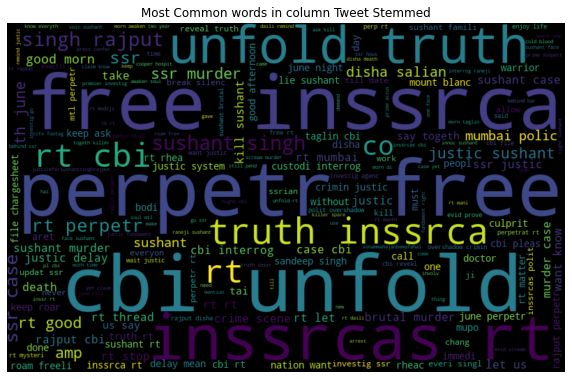

In [73]:
#visualizing all the words in column "tweet_stemmed" in our data using the wordcloud plot.
all_words = ' '.join([text for text in df['tweet_stemmed']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tweet Stemmed")
plt.show()

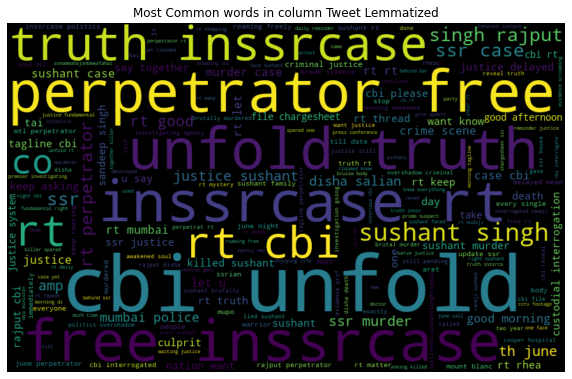

In [74]:
#Visualizing all the words in column "tweet_lemmatized" in our data using the wordcloud plot.
all_words = ' '.join([text for text in df['tweet_lemmatized']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tweet Lemmatized")
plt.show()

In [79]:
#C) Most common words in racist/sexist tweets
#Visualizing all the negative or racist/sexist words in column "tweet_stemmed" in our data using the wordcloud plot.
negative_words =' '.join([text for text in df['tweet_stemmed'][df['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most racist/sexist words in column Tweet Stemmed")
plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [92]:
#Visualizing all the negative or racist/sexist words in column "tweet_lemmatized" in our data using the wordcloud plot.
negative_words =' '.join([text for text in df['tweet_lemmatized'][df['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most racist/sexist words in column Tweet Lemmatized")
plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [80]:
#Extracting Features from Cleaned Tweets
#A - Bag-of-Words Features
# Importing library
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow_vectorizer

CountVectorizer(max_df=0.9, max_features=1000, min_df=2, stop_words='english')

In [81]:
#A.1 Bag-Of-Words feature matrix - For columns "combine_df['tweet_stemmed']"
# bag-of-words feature matrix - For columns "combine_df['tweet_stemmed']"
bow_stem = bow_vectorizer.fit_transform(df['tweet_stemmed'])
bow_stem

<2467x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 18721 stored elements in Compressed Sparse Row format>

In [82]:
#A.2 Bag-Of-Words feature matrix - For column - combine_df['tweet_lemmatized']
# bag-of-words feature matrix - For column - combine_df['tweet_lemmatized']
bow_lemm = bow_vectorizer.fit_transform(df['tweet_lemmatized'])
bow_lemm

<2467x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 18039 stored elements in Compressed Sparse Row format>

In [83]:
#B - TF-IDF Features
# Importing library
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf_vectorizer

TfidfVectorizer(max_df=0.9, max_features=1000, min_df=2, stop_words='english')

In [84]:
#B.1 TF-IDF feature matrix - For columns "combine_df['tweet_stemmed']"
# TF-IDF feature matrix - For columns "combine_df['tweet_stemmed']"
tfidf_stem = tfidf_vectorizer.fit_transform(df['tweet_stemmed'])
tfidf_stem

<2467x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 18721 stored elements in Compressed Sparse Row format>

In [85]:
#B.2 TF-IDF feature matrix - For columns "combine_df['tweet_lemmatized']"
# TF-IDF feature matrix - For columns "combine_df['tweet_lemmatized']"
tfidf_lemm = tfidf_vectorizer.fit_transform(df['tweet_lemmatized'])
tfidf_lemm

<2467x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 18039 stored elements in Compressed Sparse Row format>

In [86]:
#Logistic Regression Model Building: Twitter Sentiment Analysis
# Importing Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score